#### Mini Project: Song popularity predictor using Linear Regeression and Logistic Regression

#### Problem Statement:¶
 use machine learning to forecast how popular a song will become, analyzing various factors like audio features, metadata, and social media data to predict success

### Data Collection: 
 Use the Kaggle Song popularity predicto which contains. Download if from Kaggle.
###### https://www.kaggle.com/datasets/yasserh/song-popularity-dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\kavya\Downloads\archive (2)\song_data.csv")

In [3]:
df

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [5]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [6]:
df.tail()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
18830,Let It Breathe,60,159645,0.893,0.500,0.151,0.000065,11,0.111,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765,0.495,0.161,0.000001,11,0.105,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847,0.719,0.325,0.000000,0,0.125,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945,0.488,0.326,0.015700,3,0.119,-12.020,1,0.0328,106.063,4,0.323
18834,Up to Me,60,193533,0.911,0.640,0.381,0.000254,4,0.104,-11.790,1,0.0302,91.490,4,0.581


In [7]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [8]:
df.ndim

2

In [9]:
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

#### Handling Missing Data

In [10]:
df.isnull()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18831,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18832,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18833,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [12]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18830    False
18831    False
18832    False
18833    False
18834    False
Length: 18835, dtype: bool

In [13]:
df.duplicated().sum()

3909

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [16]:
df = pd.get_dummies(df, drop_first=True)

In [17]:
df

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,...,song_name_禁愛令 Antilove,song_name_老派約會之必要-電視影集《雙城故事》插曲,song_name_胡說八道,song_name_花요일 Blooming Day,song_name_贫民百万男孩,song_name_通過驗證,song_name_都市森林,song_name_비상연락음,song_name_빨간 맛 Red Flavor,song_name_피 땀 눈물
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,...,False,False,False,False,False,False,False,False,False,False
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,...,False,False,False,False,False,False,False,False,False,False
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,...,False,False,False,False,False,False,False,False,False,False
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,...,False,False,False,False,False,False,False,False,False,False
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,...,False,False,False,False,False,False,False,False,False,False
18831,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,...,False,False,False,False,False,False,False,False,False,False
18832,23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,...,False,False,False,False,False,False,False,False,False,False
18833,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,...,False,False,False,False,False,False,False,False,False,False


In [18]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,14926.000000,1.492600e+04,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000
mean,48.750904,2.189496e+05,0.270453,0.624514,0.639763,0.092067,5.301152,0.180435,-7.677232,0.631917,0.099419,121.105007,3.952968,0.526967
std,20.379465,6.234080e+04,0.298117,0.158081,0.221756,0.240451,3.592616,0.145097,4.018670,0.482300,0.103546,29.044644,0.316702,0.247758
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,1.839435e+05,0.023600,0.524000,0.496000,0.000000,2.000000,0.093000,-9.389500,0.000000,0.037200,98.125000,4.000000,0.332000
50%,52.000000,2.118455e+05,0.139000,0.636000,0.672000,0.000021,5.000000,0.122000,-6.750500,1.000000,0.054100,120.016000,4.000000,0.527000
75%,63.750000,2.447200e+05,0.458000,0.740000,0.818000,0.005105,8.000000,0.224000,-4.991000,1.000000,0.113000,139.940750,4.000000,0.727750
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


#### Mean, Median and Mode

In [19]:
# Mean
mean_values = df.mean(numeric_only=True)
print("Mean:", mean_values)

# Median
median_values = df.median(numeric_only=True)
print("Median:", median_values)

# Mode
mode_values = df.mode()
print("Mode:", mode_values)

Mean: song_popularity                  48.750904
song_duration_ms             218949.581201
acousticness                      0.270453
danceability                      0.624514
energy                            0.639763
                                 ...      
song_name_通過驗證                    0.000067
song_name_都市森林                    0.000067
song_name_비상연락음                   0.000067
song_name_빨간 맛 Red Flavor         0.000067
song_name_피 땀 눈물                  0.000067
Length: 13083, dtype: float64
Median: song_popularity                  52.000
song_duration_ms             211845.500
acousticness                      0.139
danceability                      0.636
energy                            0.672
                                ...    
song_name_通過驗證                    0.000
song_name_都市森林                    0.000
song_name_비상연락음                   0.000
song_name_빨간 맛 Red Flavor         0.000
song_name_피 땀 눈물                  0.000
Length: 13083, dtype: float64
Mode:    song

#### Matrix

In [20]:
#using correlation
numeric_df = df.select_dtypes(include='number') 
correlation_matrix = numeric_df.corr()
print("Correlation Matrix:", correlation_matrix)

Correlation Matrix:                   song_popularity  song_duration_ms  acousticness  \
song_popularity          1.000000         -0.007766     -0.031658   
song_duration_ms        -0.007766          1.000000     -0.113314   
acousticness            -0.031658         -0.113314      1.000000   
danceability             0.056415         -0.089338     -0.171859   
energy                  -0.016468          0.096375     -0.679235   
instrumentalness        -0.093032         -0.024850      0.179259   
key                     -0.003878         -0.006749     -0.000632   
liveness                -0.038553          0.020757     -0.085242   
loudness                 0.052114          0.027837     -0.569681   
audio_mode               0.008824         -0.028056      0.059443   
speechiness             -0.001971         -0.079438     -0.085435   
tempo                   -0.029560          0.013608     -0.144736   
time_signature           0.023307          0.004080     -0.151180   
audio_valence 

#### Data Analysis and Visualization

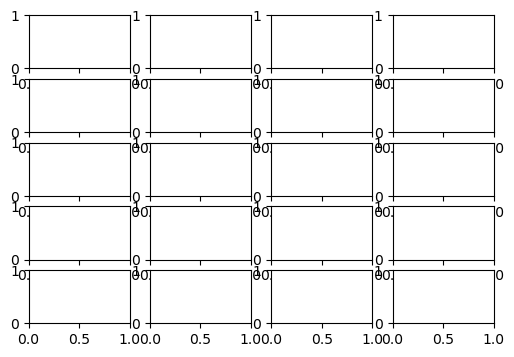

In [21]:
 import matplotlib.pyplot as plt

 fig, axs = plt.subplots(5, 4, figsize=(6,4))

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14926 entries, 0 to 18834
Columns: 13083 entries, song_popularity to song_name_피 땀 눈물
dtypes: bool(13069), float64(9), int64(5)
memory usage: 187.7 MB


#### Line Plot

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

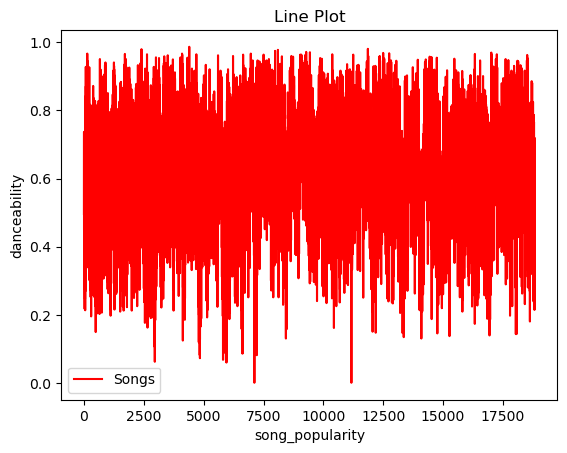

In [24]:
plt.plot(df.index, df['danceability'], label='Songs', color='r')
plt.title('Line Plot')
plt.xlabel('song_popularity')
plt.ylabel('danceability')
plt.legend()
plt.show()

#### Heatmap

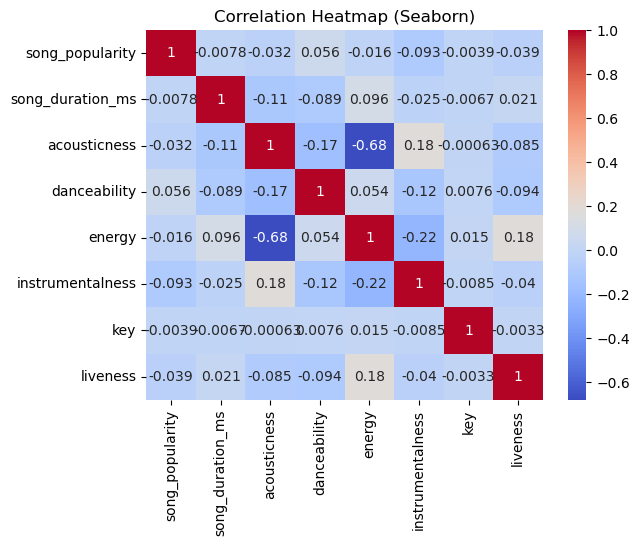

In [25]:
correlation_matrix = df[['song_popularity',	'song_duration_ms',	'acousticness',	'danceability', 
                         'energy', 'instrumentalness', 'key', 'liveness']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Seaborn)')
plt.show()

#### Bar Chart

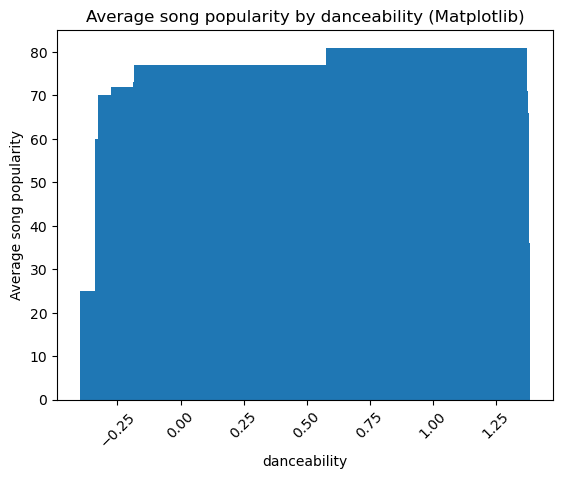

In [29]:
avg_song_popularity = df.groupby('danceability')['song_popularity'].mean()
plt.bar(avg_song_popularity.index, avg_song_popularity)
plt.xlabel('danceability')
plt.ylabel('Average song popularity')
plt.title('Average song popularity by danceability (Matplotlib)')
plt.xticks(rotation=45)
plt.show()

#### Pie Chart

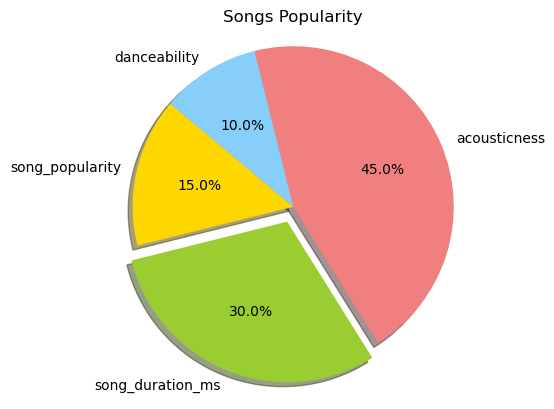

In [28]:
import matplotlib.pyplot as plt

labels = ['song_popularity', 'song_duration_ms', 'acousticness', 'danceability']
sizes = [15, 30, 45, 10]  
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0.1, 0, 0) 


plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  
plt.title("Songs Popularity")

plt.show()

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')


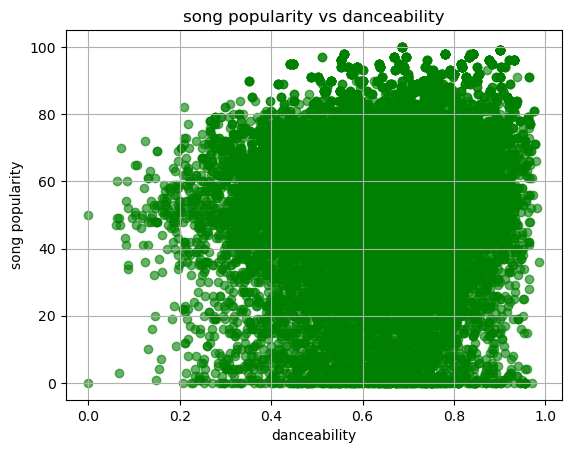

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\kavya\Downloads\archive (2)\song_data.csv")

print(df.columns)

plt.scatter(df['danceability'], df['song_popularity'], color='green', alpha=0.6)
plt.title("song popularity vs danceability")
plt.xlabel("danceability")
plt.ylabel("song popularity")
plt.grid(True)
plt.show()

#### Matplotlib

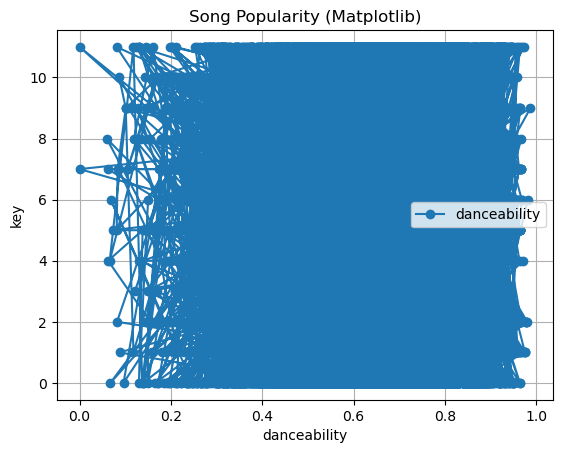

In [32]:
import matplotlib.pyplot as plt

plt.plot(df['danceability'], df['key'], marker='o', label='danceability')
plt.xlabel('danceability')
plt.ylabel('key')
plt.title('Song Popularity (Matplotlib)')
plt.legend()
plt.grid()
plt.show()

#### Linear Regression

In [33]:
X = df[['song_popularity',	'song_duration_ms',	'acousticness',	'danceability', 'energy',
        'instrumentalness',	'key',	'liveness',	'loudness', 'audio_mode', 'speechiness']]
Y = df['song_popularity']

In [34]:
X

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313
...,...,...,...,...,...,...,...,...,...,...,...
18830,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348
18831,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301
18832,23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355
18833,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328


In [35]:
Y

0        73
1        66
2        76
3        74
4        56
         ..
18830    60
18831    60
18832    23
18833    55
18834    60
Name: song_popularity, Length: 18835, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [38]:
X_train

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness
16913,65,244120,0.867000,0.329,0.319,0.039900,1,0.1140,-12.078,0,0.0335
16767,7,169200,0.417000,0.713,0.516,0.000000,0,0.1190,-5.417,1,0.0352
178,76,210200,0.263000,0.653,0.609,0.001010,11,0.2330,-7.519,0,0.0370
1647,59,236549,0.000004,0.367,0.972,0.000011,10,0.1530,-4.080,0,0.1920
10335,71,227735,0.214000,0.696,0.848,0.000000,0,0.0987,-7.839,1,0.0602
...,...,...,...,...,...,...,...,...,...,...,...
5695,58,342973,0.023700,0.711,0.816,0.797000,1,0.2940,-6.397,1,0.0515
8006,59,166678,0.056000,0.735,0.903,0.000000,0,0.2320,-4.793,0,0.2540
17745,55,176000,0.386000,0.727,0.651,0.000291,6,0.1190,-7.626,0,0.0710
17931,23,198520,0.182000,0.424,0.747,0.000013,0,0.1460,-4.644,0,0.2190


In [39]:
X_test

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness
625,58,251400,0.771000,0.620,0.1860,0.011500,7,0.0738,-19.696,1,0.0276
13069,58,291946,0.741000,0.600,0.6330,0.073600,4,0.0478,-7.507,0,0.0667
10753,52,137200,0.712000,0.648,0.3590,0.170000,0,0.1250,-13.166,0,0.1820
10664,67,254506,0.928000,0.388,0.3720,0.000000,6,0.1460,-5.720,1,0.0468
5562,64,217053,0.896000,0.551,0.3240,0.087300,0,0.2770,-10.962,1,0.0314
...,...,...,...,...,...,...,...,...,...,...,...
15495,82,269106,0.101000,0.798,0.8670,0.000000,1,0.0634,-5.971,0,0.1200
11183,50,127773,0.900000,0.718,0.0918,0.865000,0,0.1120,-19.474,1,0.0683
4562,20,326946,0.015100,0.504,0.3310,0.000006,8,0.1160,-10.335,1,0.0329
9794,57,230026,0.000384,0.457,0.6400,0.000142,0,0.0611,-12.231,1,0.0437


In [40]:
X_train

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness
16913,65,244120,0.867000,0.329,0.319,0.039900,1,0.1140,-12.078,0,0.0335
16767,7,169200,0.417000,0.713,0.516,0.000000,0,0.1190,-5.417,1,0.0352
178,76,210200,0.263000,0.653,0.609,0.001010,11,0.2330,-7.519,0,0.0370
1647,59,236549,0.000004,0.367,0.972,0.000011,10,0.1530,-4.080,0,0.1920
10335,71,227735,0.214000,0.696,0.848,0.000000,0,0.0987,-7.839,1,0.0602
...,...,...,...,...,...,...,...,...,...,...,...
5695,58,342973,0.023700,0.711,0.816,0.797000,1,0.2940,-6.397,1,0.0515
8006,59,166678,0.056000,0.735,0.903,0.000000,0,0.2320,-4.793,0,0.2540
17745,55,176000,0.386000,0.727,0.651,0.000291,6,0.1190,-7.626,0,0.0710
17931,23,198520,0.182000,0.424,0.747,0.000013,0,0.1460,-4.644,0,0.2190


In [41]:
Y_train

16913    65
16767     7
178      76
1647     59
10335    71
         ..
5695     58
8006     59
17745    55
17931    23
13151    59
Name: song_popularity, Length: 11301, dtype: int64

In [42]:
Y_test

625      58
13069    58
10753    52
10664    67
5562     64
         ..
15495    82
11183    50
4562     20
9794     57
13583    69
Name: song_popularity, Length: 7534, dtype: int64

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()

In [45]:
lm.fit(X_train,Y_train)

LinearRegression()

In [46]:
print(lm.intercept_)

-7.041478511382593e-11


In [47]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
song_popularity,1.000000e+00
song_duration_ms,3.238139e-16
acousticness,7.531775e-16
danceability,5.948738e-15
energy,-1.296505e-15
instrumentalness,-1.681186e-15
key,2.299882e-18
liveness,1.850356e-15
loudness,1.848612e-17
audio_mode,2.303329e-16


In [48]:
predictions = lm.predict(X_test)

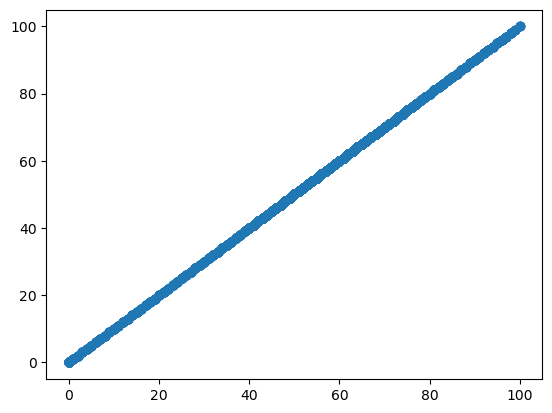

In [49]:
plt.scatter(Y_test,predictions)

C:\Users\kavya\AppData\Local\Temp\ipykernel_11968\1960946261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test-predictions),bins=50);


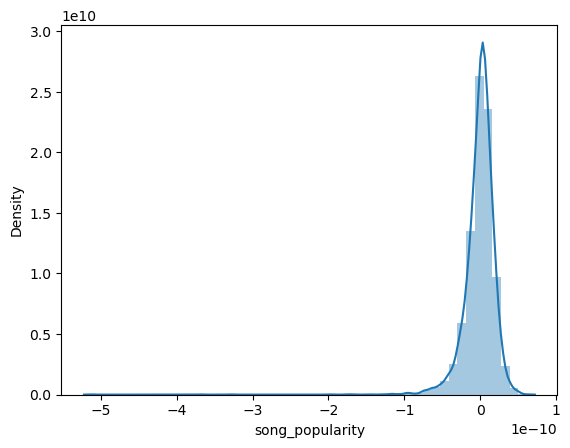

In [50]:
sns.distplot((Y_test-predictions),bins=50);

#### Logistic Regression

In [51]:
X = df[['song_popularity',	'song_duration_ms',	'acousticness',	'danceability', 'energy',
        'instrumentalness',	'key',	'liveness',	'loudness', 'audio_mode', 'speechiness']]
Y = df['song_popularity']

In [53]:
X

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313
...,...,...,...,...,...,...,...,...,...,...,...
18830,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348
18831,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301
18832,23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355
18833,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328


In [54]:
Y

0        73
1        66
2        76
3        74
4        56
         ..
18830    60
18831    60
18832    23
18833    55
18834    60
Name: song_popularity, Length: 18835, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [57]:
X_train

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness
16913,65,244120,0.867000,0.329,0.319,0.039900,1,0.1140,-12.078,0,0.0335
16767,7,169200,0.417000,0.713,0.516,0.000000,0,0.1190,-5.417,1,0.0352
178,76,210200,0.263000,0.653,0.609,0.001010,11,0.2330,-7.519,0,0.0370
1647,59,236549,0.000004,0.367,0.972,0.000011,10,0.1530,-4.080,0,0.1920
10335,71,227735,0.214000,0.696,0.848,0.000000,0,0.0987,-7.839,1,0.0602
...,...,...,...,...,...,...,...,...,...,...,...
5695,58,342973,0.023700,0.711,0.816,0.797000,1,0.2940,-6.397,1,0.0515
8006,59,166678,0.056000,0.735,0.903,0.000000,0,0.2320,-4.793,0,0.2540
17745,55,176000,0.386000,0.727,0.651,0.000291,6,0.1190,-7.626,0,0.0710
17931,23,198520,0.182000,0.424,0.747,0.000013,0,0.1460,-4.644,0,0.2190


In [58]:
X_test

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness
625,58,251400,0.771000,0.620,0.1860,0.011500,7,0.0738,-19.696,1,0.0276
13069,58,291946,0.741000,0.600,0.6330,0.073600,4,0.0478,-7.507,0,0.0667
10753,52,137200,0.712000,0.648,0.3590,0.170000,0,0.1250,-13.166,0,0.1820
10664,67,254506,0.928000,0.388,0.3720,0.000000,6,0.1460,-5.720,1,0.0468
5562,64,217053,0.896000,0.551,0.3240,0.087300,0,0.2770,-10.962,1,0.0314
...,...,...,...,...,...,...,...,...,...,...,...
15495,82,269106,0.101000,0.798,0.8670,0.000000,1,0.0634,-5.971,0,0.1200
11183,50,127773,0.900000,0.718,0.0918,0.865000,0,0.1120,-19.474,1,0.0683
4562,20,326946,0.015100,0.504,0.3310,0.000006,8,0.1160,-10.335,1,0.0329
9794,57,230026,0.000384,0.457,0.6400,0.000142,0,0.0611,-12.231,1,0.0437


In [59]:
Y_train

16913    65
16767     7
178      76
1647     59
10335    71
         ..
5695     58
8006     59
17745    55
17931    23
13151    59
Name: song_popularity, Length: 11301, dtype: int64

In [60]:
Y_test

625      58
13069    58
10753    52
10664    67
5562     64
         ..
15495    82
11183    50
4562     20
9794     57
13583    69
Name: song_popularity, Length: 7534, dtype: int64

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lm = LogisticRegression()

In [63]:
lm.fit(X_train,Y_train)

C:\Users\kavya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
print(lm.intercept_)

[-2.09999057e-05 -1.93998870e-04 -1.26861652e-04 -1.90430152e-04
 -1.91944326e-04 -1.36004903e-04 -1.22683920e-04 -1.08078886e-04
 -9.05229155e-05 -1.09805958e-04 -5.20261910e-05 -3.44964344e-05
 -1.50616262e-05 -1.88482118e-04  2.18261833e-05 -1.04500795e-04
 -1.38633061e-04 -1.13277389e-04 -1.19594488e-04 -1.22477502e-04
 -4.45473964e-05 -1.20915361e-04 -1.73241476e-04 -2.44260510e-04
 -2.01322520e-04 -1.56161615e-04  3.31636574e-05 -5.11573149e-05
 -1.02641578e-04 -6.36053684e-05  4.72612975e-05  7.64350225e-05
 -1.54706428e-04 -3.05493899e-04 -5.23574727e-05 -2.31096692e-04
  2.97743002e-05 -1.05174056e-04 -1.86505543e-05 -1.71686514e-04
 -2.09885457e-05 -1.93084643e-05 -7.80588833e-05  7.06637347e-05
 -6.50167716e-05  1.24595151e-04  2.11438403e-04  1.99440637e-04
  1.15891835e-04  2.62952844e-05  4.33279304e-04  3.09922746e-04
  4.58244213e-04  1.94668020e-04  2.64071170e-04  4.15747741e-04
  1.17798343e-04  5.80282644e-05  8.62844853e-05  7.73550626e-05
  3.58251742e-04  5.26571

In [65]:
predictions = lm.predict(X_test)

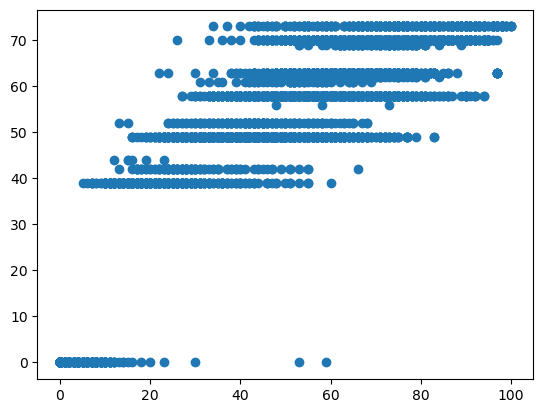

In [66]:
plt.scatter(Y_test,predictions)

C:\Users\kavya\AppData\Local\Temp\ipykernel_11968\1960946261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test-predictions),bins=50);


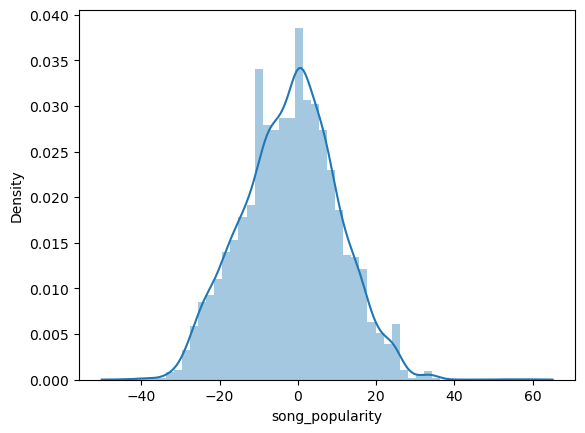

In [67]:
sns.distplot((Y_test-predictions),bins=50);